Version 3.0:
1. n-gram given different time slots


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pickle5
!pip install pandas
# !pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp39-cp39-linux_x86_64.whl size=255895 sha256=5ecfc89cf661c5fa1207e2b02be07329efb05b95a820273560efa9e03be19f9c
  Stored in directory: /root/.cache/pip/wheels/f2/7a/49/9bef8878949914ecb90c08fc5bf30a05e17f475fe7e08b63a8
Successfully built pickle5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pickle5 as pickle
import pandas as pd

In [5]:
with open('/content/drive/Shareddrives/Team HealthUnity/Lpheada-Data-Analysis/passDdtld.pkl' , 'rb') as f:
    df = pickle.load(f)

In [6]:
df = df[df['country'] == 'CA']
df = df[df['lang'] == 'en']
df = df[df['label'] == 'sq']
df.shape #28528 tweets labeled 'sq'

(23717, 68)

In [7]:
df = df[df['country'] == 'CA']
# df['local_time_hour']
# df.columns
df[['bounding_box_coordinates']]

,bounding_box_coordinates
55223,"[[[-79.810142, 43.373074], [-79.422004, 43.373..."
55224,"[[[-76.353876, 44.961937], [-75.246407, 44.961..."
55225,"[[[-119.5937583, 49.773384], [-119.319893, 49...."
55226,"[[[-125.492873, 49.902006], [-125.190691, 49.9..."
55227,"[[[-76.353876, 44.961937], [-75.246407, 44.961..."
...,...
79103,"[[[-54.259465, 49.143055], [-51.646698, 49.143..."
79104,"[[[-65.396831, 42.974526], [-63.484666, 42.974..."
79105,"[[[-79.639319, 43.403221], [-78.90582, 43.4032..."
79106,"[[[-81.391247, 42.824496], [-81.106326, 42.824..."


**it is extremely important to reset the index of a dataframe when you initialize it!!!**

In [8]:
df = df[df['local_time_nice'] != 'unknown'].reset_index(drop = True)
df

,tweet_id,user_id,user_description,tweet,country,label,city_name,city_country,country_code_j,country_j,...,smog_index_ud,automated_readability_index_ud,coleman_liau_index_ud,linsear_write_formula_ud,dale_chall_readability_score_ud,text_standard_ud,text_standard_float_ud,lexicon_count_ud,sentence_count_ud,grammar_score_ud
0,1076684792798871553,790973697624514560,King James Only Christian,""" The #sleep of a labouring man is sweet, whet...",CA,sq,Mississauga,"Mississauga, Ontario",CA,Canada,...,0.0,6.5,8.70,1.000,11.73,6th and 7th grade,7.0,4,1,0
1,1076689170041581568,105619780,"Dialysis grease monkey, biomed and now clinica...",24 hours after the full moon it looks like alm...,CA,sq,Ottawa,"Ottawa, Ontario",CA,Canada,...,8.1,2.1,3.73,3.500,6.64,3rd and 4th grade,4.0,30,4,2
2,1076690475615117314,226184450,van-based IT analyst. also community manager a...,"All I do every Christmas is wake up, watch Net...",CA,sq,Kelowna,"Kelowna, British Columbia",CA,Canada,...,0.0,11.7,14.72,4.500,13.96,13th and 14th grade,14.0,11,2,2
3,1076696357694369792,24445874,Journalist in #RedDeer for @rdnewsNOW•DAD w/ I...,The cat is clearly tired... #catnap https://t....,CA,sq,Campbell River,"Campbell River, British Columbia",CA,Canada,...,0.0,46.6,45.34,9.000,27.15,-1th and 0th grade,0.0,11,1,4
4,1076697431696379909,3909227593,Hi I’m Hayley | 23 | Canadian | love music and...,I am so fucking tired that I don’t think 10.5 ...,CA,sq,Ottawa,"Ottawa, Ontario",CA,Canada,...,0.0,10.8,6.73,16.500,11.19,10th and 11th grade,11.0,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,1249069076556787712,2269156949,Mom. Aussie Mom. Wife. Amateur Photographer. P...,@kvj_02 That's sad. Unfortunately there's goin...,CA,sq,"Division No. 8, Subd. M","Division No. 8, Subd. M, Newfoundland and Lab...",CA,Canada,...,0.0,10.3,10.80,5.500,13.90,5th and 6th grade,6.0,8,1,0
23521,1249904589715001346,354582483,Politics | Runner | Dalhousie U Alumna 🍁Tweets...,nothing is more peaceful than falling asleep t...,CA,sq,Queens,"Queens, Nova Scotia",CA,Canada,...,0.0,12.9,14.47,6.500,14.61,14th and 15th grade,15.0,9,1,2
23522,1250011384395575297,1433801762,freelance makeup artist slash beauty connoisse...,me staying up all night without sleep waiting ...,CA,sq,Toronto,"Toronto, Ontario",CA,Canada,...,0.0,19.1,21.71,4.000,15.88,8th and 9th grade,9.0,8,1,2
23523,1249010459589726209,1179791931762774017,I never check voicemail.,I slept for 12 hours.,CA,sq,London,"London, Ontario",CA,Canada,...,0.0,5.3,5.80,1.000,7.78,5th and 6th grade,6.0,4,1,0


In [9]:
sqTweetTime = pd.DataFrame(df['local_time_nice'].reset_index(drop = True))
sqTweetTime

,local_time_nice
0,2018-12-22 22:43:53
1,2018-12-22 23:01:16
2,2018-12-22 20:06:27
3,2018-12-22 20:29:50
4,2018-12-22 23:34:06
...,...
23520,2020-04-11 17:47:29
23521,2020-04-13 23:37:30
23522,2020-04-14 06:41:52
23523,2020-04-11 12:24:33


In [10]:
from datetime import datetime, time

timeTest = sqTweetTime[sqTweetTime['local_time_nice'] != 'unknown'].reset_index(drop = True)
timeProcessed = pd.DataFrame(pd.to_datetime(timeTest['local_time_nice']))

testTimeStamp = pd.DataFrame(timeProcessed['local_time_nice'].dt.time)

testTotalSecond = pd.DataFrame(pd.to_timedelta(testTimeStamp['local_time_nice'].astype(str)).dt.total_seconds())
testTotalSecond = testTotalSecond.rename(columns = {'local_time_nice': 'published_time_in_hours (sleep quality issue)'})
# testTotalSecond.shape

In [11]:
import math

0     1381
1     1094
2      931
3      795
4      744
5      736
6      904
7     1170
8     1144
9     1051
10     993
11     873
12     852
13     772
14     704
15     724
16     946
17     811
18     828
19     983
20    1015
21    1255
22    1428
23    1391
Name: published_time_in_hours (sleep quality issue), dtype: int64


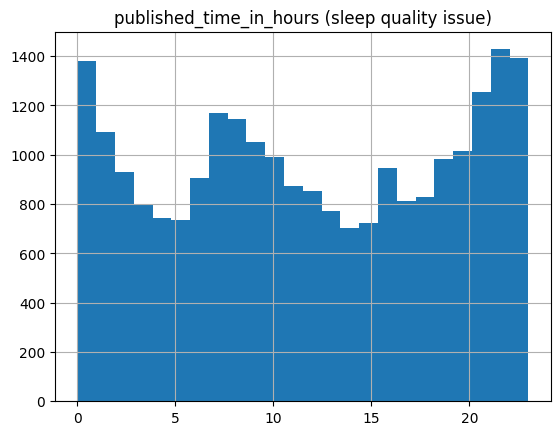

In [12]:
#graph for sleep quality data with negative labels

testTotalHour = pd.DataFrame(testTotalSecond / 3600, dtype = int)
hist = testTotalHour.hist(bins = 24)

# counted the number of tweets in each bin
bins = testTotalHour['published_time_in_hours (sleep quality issue)'].value_counts().sort_index()
print(bins)

In [13]:
type(testTotalHour)

pandas.core.frame.DataFrame

In [14]:
testTotalSecond = testTotalSecond.rename(columns = {'published_time_in_hours (sleep quality issue)': 'published_time_in_hours'})


**add the second information to the initial dataframe (but local_time_nice == "unknown" rows are eliminated)**

In [15]:
df = pd.concat([df, testTotalHour], axis = 1)

In [16]:
df = df.rename(columns = {'published_time_in_hours (sleep quality issue)': 'published_time_in_hours'})
df.head()

,tweet_id,user_id,user_description,tweet,country,label,city_name,city_country,country_code_j,country_j,...,automated_readability_index_ud,coleman_liau_index_ud,linsear_write_formula_ud,dale_chall_readability_score_ud,text_standard_ud,text_standard_float_ud,lexicon_count_ud,sentence_count_ud,grammar_score_ud,published_time_in_hours
0,1076684792798871553,790973697624514560,King James Only Christian,""" The #sleep of a labouring man is sweet, whet...",CA,sq,Mississauga,"Mississauga, Ontario",CA,Canada,...,6.5,8.70,1.0,11.73,6th and 7th grade,7.0,4,1,0,22
1,1076689170041581568,105619780,"Dialysis grease monkey, biomed and now clinica...",24 hours after the full moon it looks like alm...,CA,sq,Ottawa,"Ottawa, Ontario",CA,Canada,...,2.1,3.73,3.5,6.64,3rd and 4th grade,4.0,30,4,2,23
2,1076690475615117314,226184450,van-based IT analyst. also community manager a...,"All I do every Christmas is wake up, watch Net...",CA,sq,Kelowna,"Kelowna, British Columbia",CA,Canada,...,11.7,14.72,4.5,13.96,13th and 14th grade,14.0,11,2,2,20
3,1076696357694369792,24445874,Journalist in #RedDeer for @rdnewsNOW•DAD w/ I...,The cat is clearly tired... #catnap https://t....,CA,sq,Campbell River,"Campbell River, British Columbia",CA,Canada,...,46.6,45.34,9.0,27.15,-1th and 0th grade,0.0,11,1,4,20
4,1076697431696379909,3909227593,Hi I’m Hayley | 23 | Canadian | love music and...,I am so fucking tired that I don’t think 10.5 ...,CA,sq,Ottawa,"Ottawa, Ontario",CA,Canada,...,10.8,6.73,16.5,11.19,10th and 11th grade,11.0,22,1,0,23


In [17]:
with open ('/content/drive/Shareddrives/Team HealthUnity/Lpheada-Data-Analysis/canada_sleepquality_binarylabel_included_not_optimized.pickle', 'rb') as f:
  tmp = pickle.load(f)
tmp.shape

(23752, 74)

In [18]:
tmp = tmp[tmp['country'] == 'CA']
tmp = tmp[tmp['lang'] == 'en']
tmp = tmp[tmp['label'] == 'sq']

In [19]:
tmp[tmp['local_time_nice'] != 'unknown'].shape

(23560, 74)

**It is interesting how the number of rows in my "tmp" is different from my "df". However, I am going to merge them anyway for now.**

In [20]:
df_extracted = df[['tweet_id', 'published_time_in_hours']]
df_extracted.head()

,tweet_id,published_time_in_hours
0,1076684792798871553,22
1,1076689170041581568,23
2,1076690475615117314,20
3,1076696357694369792,20
4,1076697431696379909,23


In [21]:
merged_df = pd.merge(tmp, df_extracted, on = 'tweet_id')
# merged_df.shape
type(merged_df['published_time_in_hours'][0])

numpy.int64

In [22]:
merged_df_sorted_by_time = merged_df.sort_values('published_time_in_hours') # sort the dataframe by time
merged_df_sorted_by_time = merged_df_sorted_by_time.reset_index(drop = True) # always remember to correct the index
merged_df_sorted_by_time.head()

,tweet_id,user_id,user_description,tweet,country,label,city_name,city_country,country_code_j,country_j,...,lexicon_count_ud,sentence_count_ud,grammar_score_ud,WorkerID_1,Label1,WorkerID_2,Label2,WorkerID_3,Label3,published_time_in_hours
0,1186139007958298624,2777983910,"Love animals, Love TWD and RWNR. Norman is my ...","@wwwbigbaldhead Goodnight my sweet Norman, sle...",CA,sq,Sainte-Thérèse,"Sainte-Thérèse, Québec",CA,Canada,...,23,4,1,A2BOXK0KVXGKPU,0,A1Y3PSVSU557SW,0,Team 03,0,0
1,1169465340981649409,253630584,no it’s not okay ;),"i have soul cycle and a dance class tomorrow, ...",CA,sq,Toronto,"Toronto, Ontario",CA,Canada,...,4,1,1,A2YW44YTN5992M,0,A3CFNUD7VR2E1E,0,AKBP92VUQ7G3,0,0
2,1174214274434174976,1347236802,add snap @mz-sweeheart and follow IG @Nyalok_g,Now I’m here doing laundry 🧺 cuz I can’t sleep...,CA,sq,Calgary,"Calgary, Alberta",CA,Canada,...,7,1,1,A13U35U1PDLQDK,1,AI6VJYDFQ90ME,1,A16FY9L7QTDNRW,1,0
3,1174188774689005568,35330675,"A Treeliner from Churchill. Lover of music, fa...","I’m just saying, sleeping through the night is...",CA,sq,Churchill,"Churchill, Manitoba",CA,Canada,...,24,3,7,A2YW44YTN5992M,0,A1CF6U3GF7DZEJ,0,AKBP92VUQ7G3,0,0
4,1173452185893519360,2777983910,"Love animals, Love TWD and RWNR. Norman is my ...",@JDMorgan Goodnight and sweet dreams sleep wel...,CA,sq,Sainte-Thérèse,"Sainte-Thérèse, Québec",CA,Canada,...,23,4,1,A13U35U1PDLQDK,0,AKBP92VUQ7G3,0,A3CFNUD7VR2E1E,0,0


**binarylabel filter (uncomment it to use it); read paper again if you want to know why**

**all 3 labels have to be 1**

In [23]:
merged_df_sorted_by_time = merged_df_sorted_by_time[merged_df_sorted_by_time['Label1'] + merged_df_sorted_by_time['Label2'] + merged_df_sorted_by_time['Label3'] == 3]
merged_df_sorted_by_time = merged_df_sorted_by_time.reset_index(drop=True)

**two labels have to be 1**

In [24]:
merged_df_sorted_by_time = merged_df_sorted_by_time[merged_df_sorted_by_time['Label1'] + merged_df_sorted_by_time['Label2'] + merged_df_sorted_by_time['Label3'] == 2]
merged_df_sorted_by_time = merged_df_sorted_by_time.reset_index(drop=True)

**there still remains issue on reptitive tweets. i need to fix this**

In [24]:
condition = merged_df_sorted_by_time['tweet'].str.contains('Nicky', case=False)
merged_df_sorted_by_time.shape
# merged_df_sorted_by_time[condition]

(4769, 75)

In [25]:
# Group the rows by their values
merged_df_sorted_by_time = merged_df_sorted_by_time.drop_duplicates(subset=['tweet_id'])
merged_df_sorted_by_time.shape
origin_data = merged_df_sorted_by_time
# condition = merged_df_sorted_by_time['tweet'].str.contains('Nicky', case=False)
# merged_df_sorted_by_time[condition]

In [36]:
pd.set_option('display.max_colwidth', None)

condition = (merged_df_sorted_by_time['tweet'].str.contains('sleep tonight'))
sleep_tonight = merged_df_sorted_by_time[condition][['tweet', 'weekday_']]
sleep_tonight['tweet']

23                                                                                                                                                                                                                           Good chance I’m not getting sleep tonight, Joy #whoneedssleepanyway
33                                                                                                                                                                                                              @lynesworld I haven’t left Halifax for two years and still can’t sleep tonight 😡
49                                                                                                                                                                                                                            Last night I couldn't sleep at all and I will fall a sleep tonight
79                                                                                                                                   

**three different time slots in a day**

In [ ]:
# Define a function to map hours to their corresponding ranges
from google.colab import files

def map_hour_range(hour):
    if 5 <= hour <= 12:
        return '5-12'
    elif 13 <= hour <= 20:
        return '13-20'
    else:
        return '21-4'

# Create a new column 'hour_range'
merged_df_sorted_by_time['hour_range'] = merged_df_sorted_by_time['published_time_in_hours'].apply(map_hour_range)

# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('hour_range')

# Iterate over the groups and create sub-dataframes
for hour_range, group in groups:
    filename = hour_range + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**next: day of a week was weekday_ column originally there or hydrated data**

In [25]:
merged_df_sorted_by_time["weekday_"]

0       Wed
1       Thu
2       Thu
3       Tue
4       Fri
       ... 
4764    Wed
4765    Wed
4766    Thu
4767    Thu
4768    Tue
Name: weekday_, Length: 4030, dtype: object

In [ ]:
from google.colab import files

# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('weekday_')

# Iterate over the groups and create sub-dataframes
for weekday, group in groups:
    filename = weekday + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**weekday + weekend** grouping analysis

In [33]:
# Assuming merged_df_sorted_by_time already exists and has a "weekday_" column
def get_weekday_or_weekend(day):
    if day in ["Mon", "Tue", "Wed", "Thu", "Fri"]:
        return "weekday"
    else:
        return "weekend"

merged_df_sorted_by_time["weekday_or_weekend"] = merged_df_sorted_by_time["weekday_"].apply(get_weekday_or_weekend)
print(merged_df_sorted_by_time[merged_df_sorted_by_time["weekday_or_weekend"] == "weekday"].shape)
print(merged_df_sorted_by_time[merged_df_sorted_by_time["weekday_or_weekend"] == "weekend"].shape)

from google.colab import files

# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('weekday_or_weekend')

# Iterate over the groups and create sub-dataframes
for tmp, group in groups:
    filename = tmp + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

(2970, 76)
(1060, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Monday + other days in a week** grouping analysis

In [47]:
# Assuming merged_df_sorted_by_time already exists and has a "weekday_" column
def get_monday_or_other_day(day):
    if day in ["Mon"]:
        return "Mondays"
    else:
        return "Other Days"

merged_df_sorted_by_time["monday_or_other_day"] = merged_df_sorted_by_time["weekday_"].apply(get_monday_or_other_day)
print(merged_df_sorted_by_time[merged_df_sorted_by_time["monday_or_other_day"] == "Mondays"].shape)
print(merged_df_sorted_by_time[merged_df_sorted_by_time["monday_or_other_day"] == "Other Days"].shape)

from google.colab import files

# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('monday_or_other_day')

# Iterate over the groups and create sub-dataframes
for tmp, group in groups:
    filename = tmp + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

(648, 77)
(3382, 77)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**next: week of a month (need to process data so i skip this first)** 


In [ ]:
pass

**next: month of a year** 

In [ ]:
merged_df_sorted_by_time[merged_df_sorted_by_time['month_'] == 'Feb']

,tweet_id,user_id,user_description,tweet,country,label,city_name,city_country,country_code_j,country_j,...,sentence_count_ud,grammar_score_ud,WorkerID_1,Label1,WorkerID_2,Label2,WorkerID_3,Label3,published_time_in_hours,hour_range
1,1091199508787150848,71586866,Brisbane AU | Toronto ON. I probably made out ...,I won’t be able to sleep tonight if I don’t le...,CA,sq,Oakville,"Oakville, Ontario",CA,Canada,...,2,0,AI6VJYDFQ90ME,1,A3CFNUD7VR2E1E,0,AI6VJYDFQ90ME,1,0,21-4
38,1091579767432847360,404435208,(she/her) often sarcastic.,Ah yes. Another sleep where I wake up an hour ...,CA,sq,Winnipeg,"Winnipeg, Manitoba",CA,Canada,...,1,0,AI6VJYDFQ90ME,0,AFIIFNK4FM7MZ,1,AFS04JY1ZARXK,1,0,21-4
50,1232166594731790336,22859440,"Living day by day, enjoying family, friends an...",I cannot go to sleep until @NICKMERCS gets off...,CA,sq,Cape Breton,"Cape Breton, Nova Scotia",CA,Canada,...,2,0,A1Y3PSVSU557SW,0,AM2W23THD4CI7,1,A3GUJ6JD25FX7O,1,0,21-4
60,1232533663604256768,3405843435,"Storm Chaser, Photographer, Adventurer, Starga...",@stormwx1 @WxOntario1 Oh dear. Ontario weather...,CA,sq,Ingersoll,"Ingersoll, Ontario",CA,Canada,...,2,1,A1CF6U3GF7DZEJ,1,A16FY9L7QTDNRW,1,A1Y3PSVSU557SW,0,0,21-4
64,1232907893562904576,3405843435,"Storm Chaser, Photographer, Adventurer, Starga...",It's hard to sleep on the night before big-tim...,CA,sq,Ingersoll,"Ingersoll, Ontario",CA,Canada,...,2,1,A3GUJ6JD25FX7O,1,A3CFNUD7VR2E1E,1,A2UF2FRGVW4T89,0,0,21-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1230373598386245638,70962843,BABY WE'RE A DYING BREED,I already can't wait to nap tomorrow,CA,sq,Edmonton,"Edmonton, Alberta",CA,Canada,...,1,0,AI6VJYDFQ90ME,1,AI6VJYDFQ90ME,1,A16FY9L7QTDNRW,0,23,21-4
4261,1228892748209623040,151004953,I really wish I knew what a bio would usually ...,What do we do... now that we cannot sleep?????,CA,sq,Toronto,"Toronto, Ontario",CA,Canada,...,1,0,A2WNW8A4MOR7T7,0,A5BMA5POGL8DW,1,A5BMA5POGL8DW,1,23,21-4
4283,1229256010260525056,1160663317,Journalist • Director of Live Operations @blog...,I have work at 4am. This 4th quarter with no t...,CA,sq,Toronto,"Toronto, Ontario",CA,Canada,...,1,1,A3GUJ6JD25FX7O,1,A16FY9L7QTDNRW,0,AI6VJYDFQ90ME,1,23,21-4
4285,1093727143492767744,32715822,Did you find my twitter ? no you didn’t.,Might fuck around and catch more than 5 hours ...,CA,sq,Toronto,"Toronto, Ontario",CA,Canada,...,2,1,AI6VJYDFQ90ME,1,A2UF2FRGVW4T89,1,A34M93NJC830DP,0,23,21-4


In [ ]:
from google.colab import files

# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('month_')

# Iterate over the groups and create sub-dataframes
for month, group in groups:
    filename = month + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**next: season**

In [ ]:
# Group the DataFrame by 'hour_range'
groups = merged_df_sorted_by_time.groupby('season')

# Iterate over the groups and create sub-dataframes
for season, group in groups:
    filename = season + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**sex**

In [ ]:
merged_df_sorted_by_time[['_male', '_female']]

unknown_rows = merged_df_sorted_by_time[(merged_df_sorted_by_time['_male'] == 'unknown') | (merged_df_sorted_by_time['_female'] == 'unknown')]
unknown_rows[['_male', '_female']].shape

(2559, 2)

In [ ]:
merged_df_sorted_by_time[['output.gender.male', 'output.gender.female']]

unknown_rows = merged_df_sorted_by_time[(merged_df_sorted_by_time['output.gender.male'] == 'unknown') | (merged_df_sorted_by_time['output.gender.female'] == 'unknown')]
unknown_rows[['output.gender.male', 'output.gender.female']].shape

(25, 2)

In [ ]:
condition = (merged_df_sorted_by_time['output.gender.male'] != 'unknown') & (merged_df_sorted_by_time['output.gender.female'] != 'unknown')
merged_df_sorted_by_time = merged_df_sorted_by_time[condition]
merged_df_sorted_by_time[['output.gender.male', 'output.gender.female']]
merged_df_sorted_by_time['guessed_gender'] = df.apply(lambda row: 'male' if row['output.gender.male'] > row['output.gender.female'] else 'female', axis=1)

<ipython-input-36-4a5f09764dff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sorted_by_time['guessed_gender'] = df.apply(lambda row: 'male' if row['output.gender.male'] > row['output.gender.female'] else 'female', axis=1)


In [ ]:
from google.colab import files

groups = merged_df_sorted_by_time.groupby('guessed_gender')

for gender, group in groups:
    filename = gender + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**next: age**

In [65]:
merged_df_sorted_by_time = origin_data
condition = ((merged_df_sorted_by_time['_lt18'] == 'unknown') | 
                         (merged_df_sorted_by_time['_1929'] == 'unknown') | 
                         (merged_df_sorted_by_time['_3039'] == 'unknown') |
                         (merged_df_sorted_by_time['_gt40'] == 'unknown'))
merged_df_sorted_by_time = merged_df_sorted_by_time[condition]
merged_df_sorted_by_time[['_lt18', '_1929', '_3039', '_gt40']].shape

(2787, 4)

In [66]:
merged_df_sorted_by_time = origin_data
condition = ((merged_df_sorted_by_time['output.age.<=18'] == 'unknown') | 
                         (merged_df_sorted_by_time['output.age.19-29'] == 'unknown') | 
                         (merged_df_sorted_by_time['output.age.30-39'] == 'unknown') |
                         (merged_df_sorted_by_time['output.age.>=40'] == 'unknown'))
merged_df_sorted_by_time = merged_df_sorted_by_time[condition]
merged_df_sorted_by_time[['output.age.<=18', 'output.age.19-29', 'output.age.30-39', 'output.age.>=40']].shape

(29, 4)

In [67]:
merged_df_sorted_by_time = origin_data
condition = ((merged_df_sorted_by_time['output.age.<=18'] != 'unknown') & 
                         (merged_df_sorted_by_time['output.age.19-29'] != 'unknown') &
                         (merged_df_sorted_by_time['output.age.30-39'] != 'unknown') &
                         (merged_df_sorted_by_time['output.age.>=40'] != 'unknown'))
merged_df_sorted_by_time = merged_df_sorted_by_time[condition]

In [68]:
def get_guessed_age(row):
    age_ranges = ['le18', '19-29', '30-39', 'ge40']
    age_counts = [row['output.age.<=18'], row['output.age.19-29'], 
                  row['output.age.30-39'], row['output.age.>=40']]
    max_count = max(age_counts)
    max_index = age_counts.index(max_count)
    return age_ranges[max_index]

merged_df_sorted_by_time['guessed_age'] = merged_df_sorted_by_time.apply(get_guessed_age, axis=1)
merged_df_sorted_by_time[['output.age.<=18', 'output.age.19-29', 'output.age.30-39', 'output.age.>=40', 'guessed_age']]

<ipython-input-68-d8cd3cd4249f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sorted_by_time['guessed_age'] = merged_df_sorted_by_time.apply(get_guessed_age, axis=1)


,output.age.<=18,output.age.19-29,output.age.30-39,output.age.>=40,guessed_age
0,0.1221,0.8053,0.0693,0.0033,19-29
1,0.0128,0.0246,0.6221,0.3404,30-39
2,0.0032,0.0134,0.0318,0.9516,ge40
3,0.0556,0.9367,0.0025,0.0052,19-29
4,0.0032,0.0134,0.0318,0.9516,ge40
...,...,...,...,...,...
4764,0.4159,0.5293,0.0469,0.008,19-29
4765,0.2994,0.6134,0.0187,0.0685,19-29
4766,0.0024,0.9043,0.0931,0.0002,19-29
4767,0.1499,0.7604,0.0447,0.0451,19-29


In [71]:
from google.colab import files

groups = merged_df_sorted_by_time.groupby('guessed_age')

for age, group in groups:
    filename = age + '.csv'
    group.to_csv(filename, index=False)
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**visualize age group bigrams with an extra dimension of time (e.g. for a single bigram, different days in a week), this way could possibly help to find more insights**


In [82]:
first_age_group = merged_df_sorted_by_time[merged_df_sorted_by_time['guessed_age'] == "ge40"]
print(first_age_group.shape)

from google.colab import files

# Group the DataFrame by 'hour_range'
groups = first_age_group.groupby('weekday_')

# Iterate over the groups and create sub-dataframes
for weekday, group in groups:
    filename = weekday + '.csv'
    print(group.shape)
    group.to_csv(filename, index=False)
    files.download(filename)

(606, 76)
(85, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(90, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(78, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(81, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(95, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(107, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(70, 76)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualizations**

**for age**

<ipython-input-40-2b9537f55639>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)
<ipython-input-40-2b9537f55639>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)
<ipython-input-40-2b9537f55639>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignor

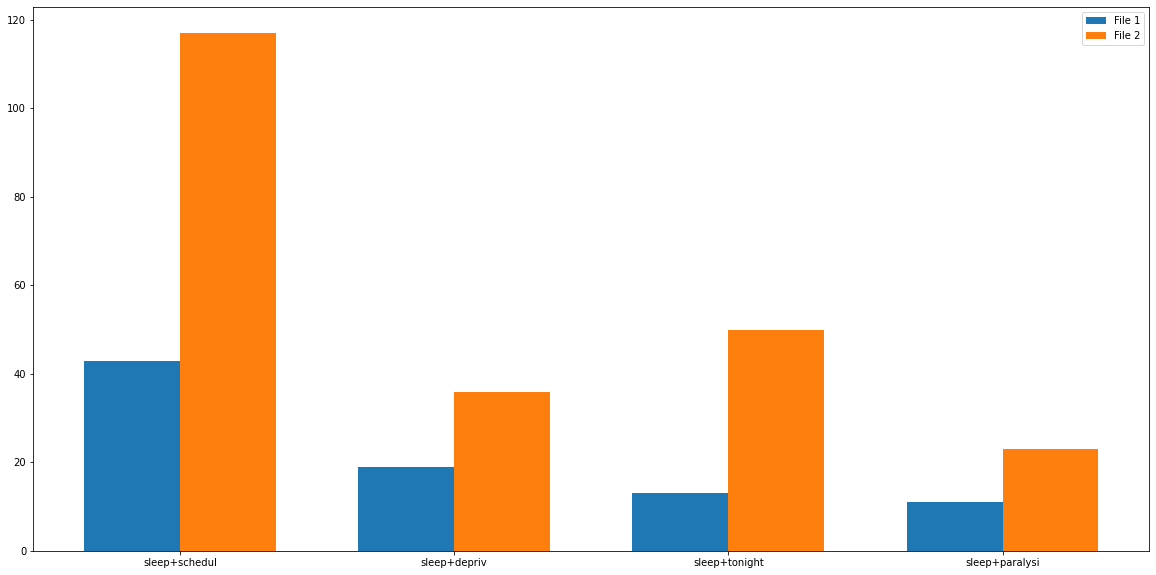

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files into two dataframes
df1 = pd.read_csv('le18 (n>1).csv')
df2 = pd.read_csv('19-29 (n>1).csv')

# Merge the two dataframes on the 'word1' and 'word2' columns
merged_df = pd.merge(df1, df2, on=['word1', 'word2'], suffixes=('_1', '_2'), how='inner')

# Get the unique combinations of 'word1' and 'word2'
unique_pairs = merged_df[['word1', 'word2']].drop_duplicates().reset_index(drop=True)

# Create a new dataframe to store the values for each group
grouped_df = pd.DataFrame(columns=['word', 'n_1', 'n_2'])
for i in range(len(unique_pairs)):
    row = unique_pairs.iloc[i]
    n1 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_1'].values.tolist()
    n2 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_2'].values.tolist()
    grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
valid_pairs = []
for i in range(len(grouped_df)):
    word = grouped_df.loc[i, 'word']
    n1 = grouped_df.loc[i, 'n_1']
    n2 = grouped_df.loc[i, 'n_2']
    if n1 >= 20 or n2 >= 20:
        ax.bar(i - bar_width/2, n1, width=bar_width, label='File 1' if i == 0 else None, color='tab:blue')
        ax.bar(i + bar_width/2, n2, width=bar_width, label='File 2' if i == 0 else None, color='tab:orange')
        valid_pairs.append(word)
ax.set_xticks(range(len(valid_pairs)))
ax.set_xticklabels(valid_pairs)
ax.legend()

# Show the plot
plt.show()


<ipython-input-50-480e8bfb7cc5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)
<ipython-input-50-480e8bfb7cc5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)
<ipython-input-50-480e8bfb7cc5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignor

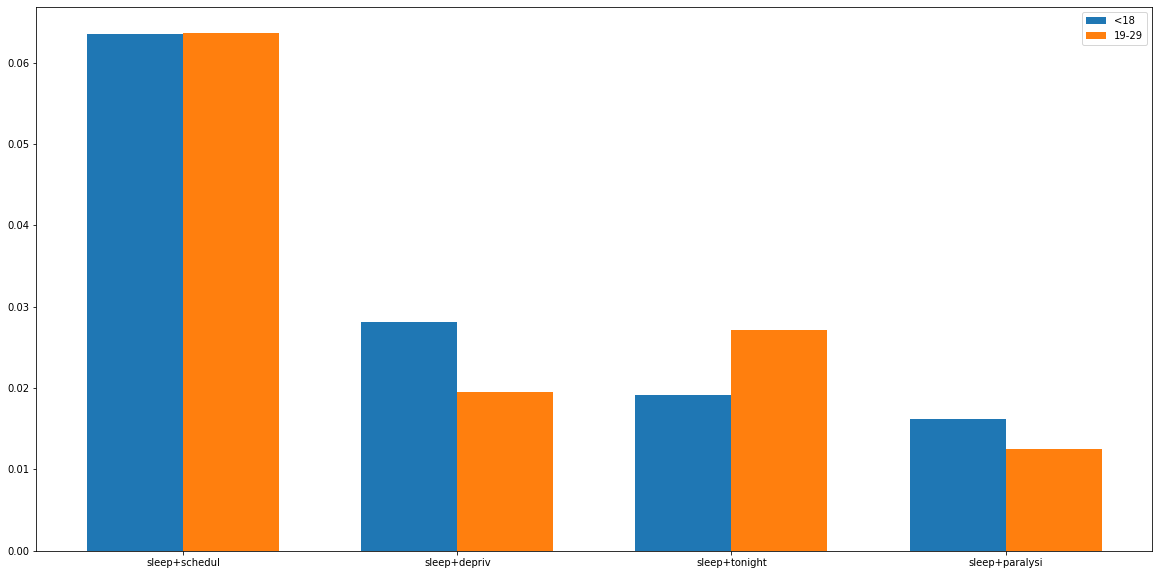

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the four CSV files into four dataframes
df1 = pd.read_csv('le18 (n>1).csv')
df2 = pd.read_csv('19-29 (n>1).csv')
df3 = pd.read_csv('le18.csv')
df4 = pd.read_csv('19-29.csv')

file1_rows = df3.shape[0]
file2_rows = df4.shape[0]

# Merge the two dataframes on the 'word1' and 'word2' columns
merged_df = pd.merge(df1, df2, on=['word1', 'word2'], suffixes=('_1', '_2'), how='inner')

# Get the unique combinations of 'word1' and 'word2'
unique_pairs = merged_df[['word1', 'word2']].drop_duplicates().reset_index(drop=True)

# Create a new dataframe to store the values for each group
grouped_df = pd.DataFrame(columns=['word', 'n_1', 'n_2'])
for i in range(len(unique_pairs)):
    row = unique_pairs.iloc[i]
    n1 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_1'].values.tolist()
    n2 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_2'].values.tolist()
    grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0}, ignore_index=True)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
valid_pairs = []
for i in range(len(grouped_df)):
    word = grouped_df.loc[i, 'word']
    n1 = grouped_df.loc[i, 'n_1']
    n2 = grouped_df.loc[i, 'n_2']

    if n1 >= 20 or n2 >= 20:
        ratio1 = n1 / file1_rows
        ratio2 = n2 / file2_rows
        ax.bar(i - bar_width/2, ratio1, width=bar_width, label='<18' if i == 0 else None, color='tab:blue')
        ax.bar(i + bar_width/2, ratio2, width=bar_width, label='19-29' if i == 0 else None, color='tab:orange')
        valid_pairs.append(word)
ax.set_xticks(range(len(valid_pairs)))
ax.set_xticklabels(valid_pairs)
ax.legend()

# Show the plot
plt.show()


**The code performs the following tasks:**
1.   Import required libraries: pandas and matplotlib.pyplot are imported for data manipulation and plotting, respectively.
2.   Load the eight CSV files: Four CSV files containing the count of unique word pairs for different age groups with n > 1 (df1, df2, df3, df4) and four CSV files containing the total number of word pairs for each age group (file1, file2, file3, file4) are read into separate DataFrames.
3.   Calculate the number of rows in each file: The number of rows in file1, file2, file3, and file4 are calculated and stored in file1_rows, file2_rows, file3_rows, and file4_rows, respectively.
4.   Merge DataFrames: The four DataFrames (df1, df2, df3, and df4) are merged based on the 'word1' and 'word2' columns, creating a new DataFrame called merged_df. The 'n' column for each DataFrame is renamed to 'n_1', 'n_2', 'n_3', and 'n_4' during the merging process to avoid confusion.
5.   Fill NaN values: Any NaN values in the merged_df DataFrame are replaced with 0.
6.   Get unique combinations of 'word1' and 'word2': The unique combinations of 'word1' and 'word2' are extracted from the merged_df DataFrame and stored in a new DataFrame called unique_pairs.
7.   Create a new DataFrame to store the values for each group: A new DataFrame called grouped_df is created to store the combined word pairs (word1 + word2), and their corresponding counts (n_1, n_2, n_3, n_4) for each age group.
8.   Iterate through unique_pairs: For each unique pair of words in unique_pairs, the corresponding counts for each age group are extracted from the merged_df DataFrame and appended as a new row to the grouped_df DataFrame.
9.   Create a grouped bar chart: A grouped bar chart is created using the data in the grouped_df DataFrame. The bar chart displays the ratio of counts for each unique word pair in the four age groups (<=18, 19-29, 30-39, and >=40). The bars are displayed in different colors for each age group, and labels are provided for easier identification.
10.   Customize the x-axis labels: The x-axis labels are set to the combined word pairs (word1 + word2), rotated at a 45-degree angle for better readability.
11.   Display the plot: The grouped bar chart is displayed using plt.show().

<ipython-input-57-5f85f3c3b7c6>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0, 'n_3': n3[0] if len(n3) > 0 else 0, 'n_4': n4[0] if len(n4) > 0 else 0}, ignore_index=True)
<ipython-input-57-5f85f3c3b7c6>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0, 'n_3': n3[0] if len(n3) > 0 else 0, 'n_4': n4[0] if len(n4) > 0 else 0}, ignore_index=True)
<ipython-input-57-5f85f3c3b7c6>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_d

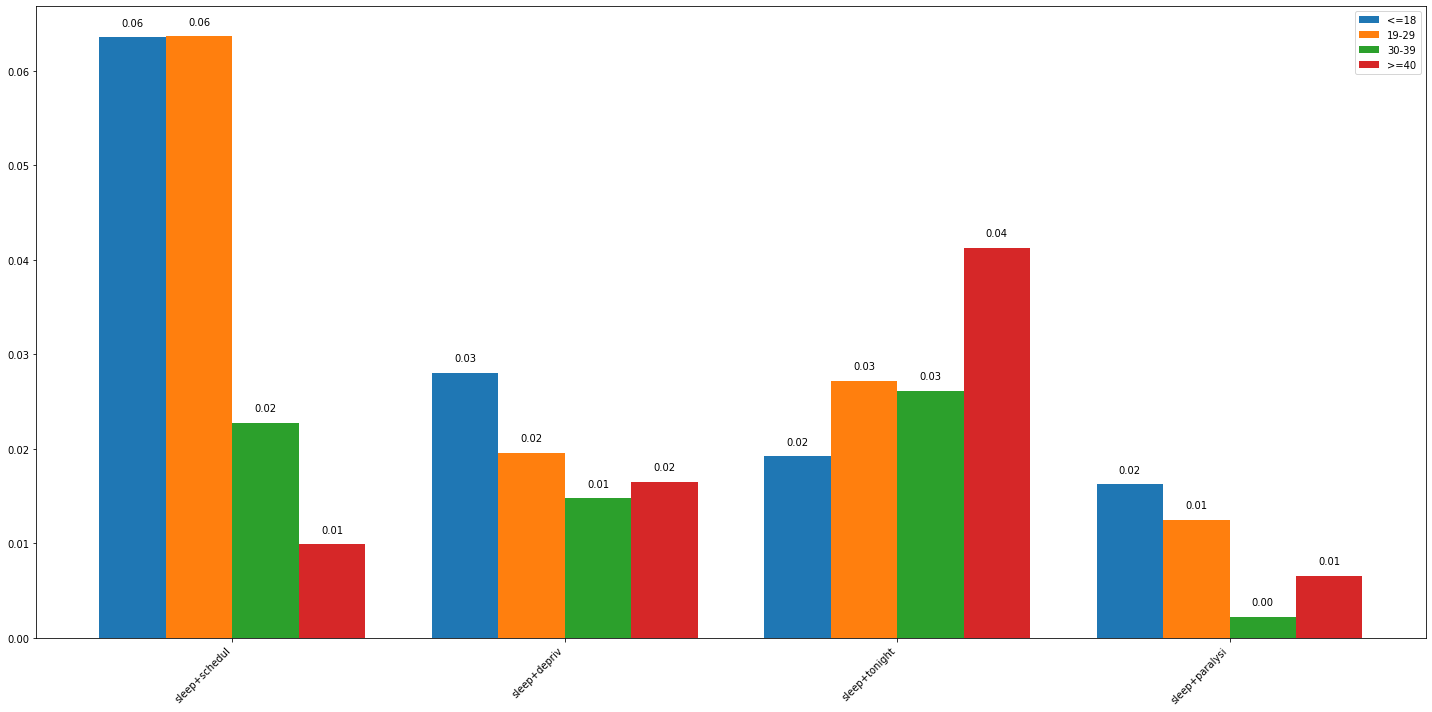

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the eight CSV files into eight dataframes
df1 = pd.read_csv('le18 (n>1).csv')
df2 = pd.read_csv('19-29 (n>1).csv')
df3 = pd.read_csv('30-39 (n>1).csv')
df4 = pd.read_csv('ge40 (n>1).csv')
file1 = pd.read_csv('le18.csv')
file2 = pd.read_csv('19-29.csv')
file3 = pd.read_csv('30-39.csv')
file4 = pd.read_csv('ge40.csv')

file1_rows = file1.shape[0]
file2_rows = file2.shape[0]
file3_rows = file3.shape[0]
file4_rows = file4.shape[0]

# Merge the four dataframes on the 'word1' and 'word2' columns
merged_df = pd.merge(df1, df2, on=['word1', 'word2'], suffixes=('_1', '_2'), how='outer')
merged_df = pd.merge(merged_df, df3.rename(columns={'n': 'n_3'}), on=['word1', 'word2'], how='outer')
merged_df = pd.merge(merged_df, df4.rename(columns={'n': 'n_4'}), on=['word1', 'word2'], how='outer')

merged_df = merged_df.fillna(0)



# Get the unique combinations of 'word1' and 'word2'
unique_pairs = merged_df[['word1', 'word2']].drop_duplicates().reset_index(drop=True)

# Create a new dataframe to store the values for each group
grouped_df = pd.DataFrame(columns=['word', 'n_1', 'n_2', 'n_3', 'n_4'])

for i in range(len(unique_pairs)):
    row = unique_pairs.iloc[i]
    n1 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_1'].values.tolist()
    n2 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_2'].values.tolist()
    n3 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_3'].values.tolist()
    n4 = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_4'].values.tolist()
    grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_1': n1[0] if len(n1) > 0 else 0, 'n_2': n2[0] if len(n2) > 0 else 0, 'n_3': n3[0] if len(n3) > 0 else 0, 'n_4': n4[0] if len(n4) > 0 else 0}, ignore_index=True)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('white')
ax.set_facecolor('white')
bar_width = 0.2
valid_pairs = []

for i, row in grouped_df.iterrows():
    word = row['word']
    n1 = row['n_1']
    n2 = row['n_2']
    n3 = row['n_3']
    n4 = row['n_4']

    if n1 >= 20 or n2 >= 20 or n3 >= 20 or n4 >= 20:
        ratio1 = n1 / file1_rows
        ratio2 = n2 / file2_rows
        ratio3 = n3 / file3_rows
        ratio4 = n4 / file4_rows
        ax.bar(i - 3*bar_width/2, ratio1, width=bar_width, label='<=18' if i == 0 else None, color='tab:blue')
        ax.bar(i - bar_width/2, ratio2, width=bar_width, label='19-29' if i == 0 else None, color='tab:orange')
        ax.bar(i + bar_width/2, ratio3, width=bar_width, label='30-39' if i == 0 else None, color='tab:green')
        ax.bar(i + 3*bar_width/2, ratio4, width=bar_width, label='>=40' if i == 0 else None, color='tab:red')
        valid_pairs.append(word)
        for j, height in enumerate([ratio1, ratio2, ratio3, ratio4]):
          ax.text(i - 3*bar_width/2 + j * bar_width, height + 0.001, '%.2f' % height, ha='center', va='bottom')

ax.set_xticks(range(len(valid_pairs)))
ax.set_xticklabels(valid_pairs, rotation=45, ha='right')
ax.legend()


plt.savefig('grouped_bar_chart.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


**for gender**

<ipython-input-65-de67aa72e85c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_male': n_male[0] if len(n_male) > 0 else 0, 'n_female': n_female[0] if len(n_female) > 0 else 0}, ignore_index=True)
<ipython-input-65-de67aa72e85c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_male': n_male[0] if len(n_male) > 0 else 0, 'n_female': n_female[0] if len(n_female) > 0 else 0}, ignore_index=True)
<ipython-input-65-de67aa72e85c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_male': n_male[0] if

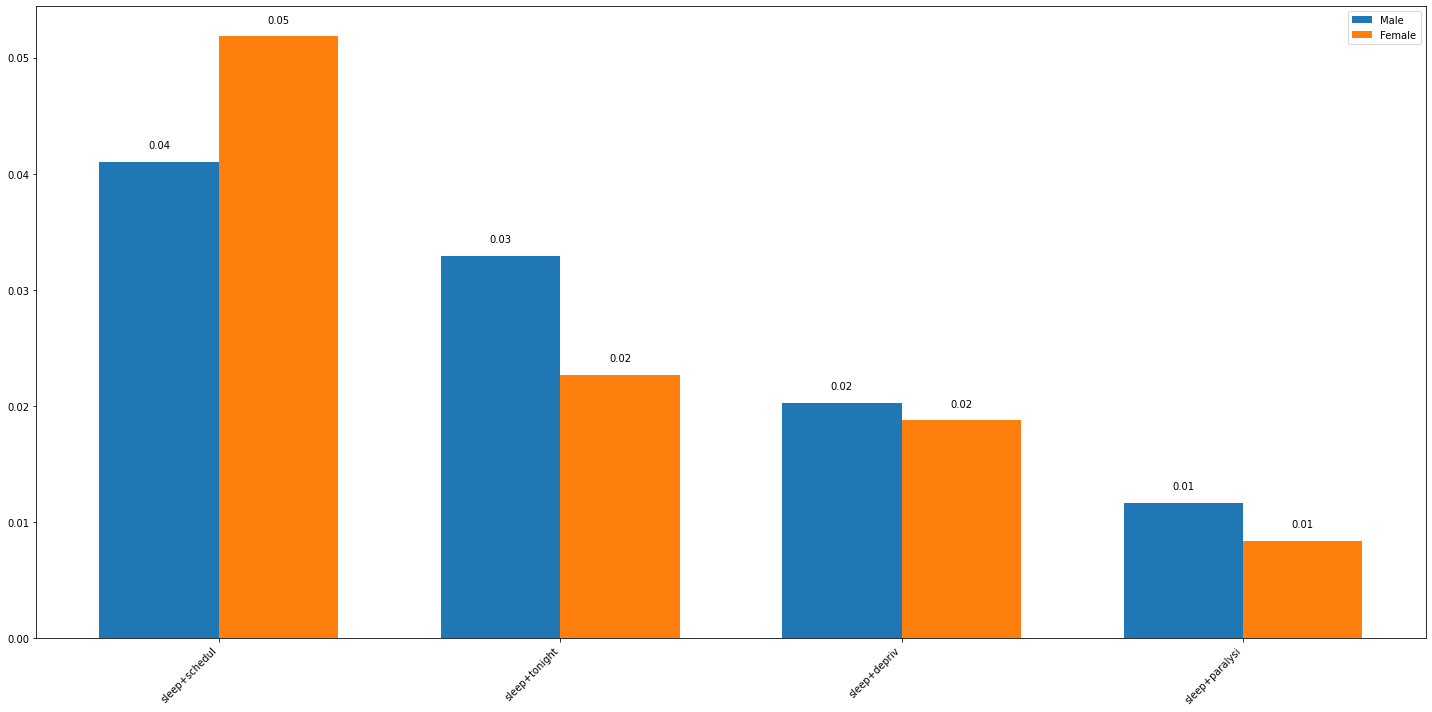

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the four CSV files into four dataframes
df1 = pd.read_csv('male (n>1).csv')
df2 = pd.read_csv('female (n>1).csv')
file1 = pd.read_csv('male.csv')
file2 = pd.read_csv('female.csv')

file1_rows = file1.shape[0]
file2_rows = file2.shape[0]

# Merge the two dataframes on the 'word1' and 'word2' columns
merged_df = pd.merge(df1, df2, on=['word1', 'word2'], suffixes=('_male', '_female'), how='outer')
merged_df = merged_df.fillna(0)

# Get the unique combinations of 'word1' and 'word2'
unique_pairs = merged_df[['word1', 'word2']].drop_duplicates().reset_index(drop=True)

# Create a new dataframe to store the values for each group
grouped_df = pd.DataFrame(columns=['word', 'n_male', 'n_female'])

for i in range(len(unique_pairs)):
    row = unique_pairs.iloc[i]
    n_male = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_male'].values.tolist()
    n_female = merged_df.loc[(merged_df['word1'] == row['word1']) & (merged_df['word2'] == row['word2']), 'n_female'].values.tolist()
    grouped_df = grouped_df.append({'word': row['word1'] + '+' + row['word2'], 'n_male': n_male[0] if len(n_male) > 0 else 0, 'n_female': n_female[0] if len(n_female) > 0 else 0}, ignore_index=True)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('white')
ax.set_facecolor('white')
bar_width = 0.35
valid_pairs = []

for i in range(len(grouped_df)):
    word = grouped_df.loc[i, 'word']
    n_male = grouped_df.loc[i, 'n_male']
    n_female = grouped_df.loc[i, 'n_female']

    if n_male >= 20 or n_female >= 20:
        ratio_male = n_male / file1_rows
        ratio_female = n_female / file2_rows
        ax.bar(i - bar_width/2, ratio_male, width=bar_width, label='Male' if i == 0 else None, color='tab:blue')
        ax.bar(i + bar_width/2, ratio_female, width=bar_width, label='Female' if i == 0 else None, color='tab:orange')
        valid_pairs.append(word)
        for j, height in enumerate([ratio_male, ratio_female]):
            ax.text(i - bar_width/2 + j * bar_width, height + 0.001, '%.2f' % height, ha='center', va='bottom')

ax.set_xticks(range(len(valid_pairs)))
ax.set_xticklabels(valid_pairs, rotation=45, ha='right')
ax.legend()

plt.savefig('grouped_bar_chart.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.tight_layout()
plt.show()


**for day in a week (debugging needed)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the days and the suffixes
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Read CSV files into dataframes
dfs = {}
for day in days:
    for suffix in ["", " (n>1)"]:
        file_name = f"{day}{suffix}.csv"
        key = f"{day}{suffix}"  # Store the key without the .csv extension
        dfs[key] = pd.read_csv(file_name)

        # Set index to a MultiIndex of 'word1' and 'word2' for the "(n>1)" dataframes
        if suffix == " (n>1)":
            dfs[key] = dfs[key].set_index(["word1", "word2"])

# Merge dataframes and compute ratios
ratios = {}
for day in days:
    merged_df = pd.merge(
        dfs[f"{day} (n>1)"],
        dfs[day],
        left_index=True,
        right_index=True,
        suffixes=("_filtered", "_all"),
        how="outer",
    ).fillna(0)

    merged_df["ratio"] = merged_df["n_filtered"] / merged_df["n_all"]
    ratios[day] = merged_df[["ratio"]].reset_index()

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor("white")
ax.set_facecolor("white")
bar_width = 0.2

xtick_labels = set()
for i, day in enumerate(days):
    valid_rows = ratios[day].loc[ratios[day]["ratio"] > 0]
    x = [i + j * bar_width for j in range(len(valid_rows))]
    y = valid_rows["ratio"].values
    xtick_labels |= set(zip(valid_rows["word1"], valid_rows["word2"]))
    ax.bar(x, y, width=bar_width, label=day)

xtick_labels = [f"{x[0]}+{x[1]}" for x in sorted(list(xtick_labels))]
ax.set_xticks(range(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha="right")
ax.legend()

# Add the ratio labels at the top of the bars
for i, day in enumerate(days):
    valid_rows = ratios[day].loc[ratios[day]["ratio"] > 0]
    x = [i + j * bar_width for j in range(len(valid_rows))]
    y = valid_rows["ratio"].values
    for xi, yi in zip(x, y):
        ax.text(xi, yi + 0.001, f"{yi:.2f}", ha="center", va="bottom")

plt.savefig("grouped_bar_chart.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


ValueError: ignored

"weekday + weekend" visualization 

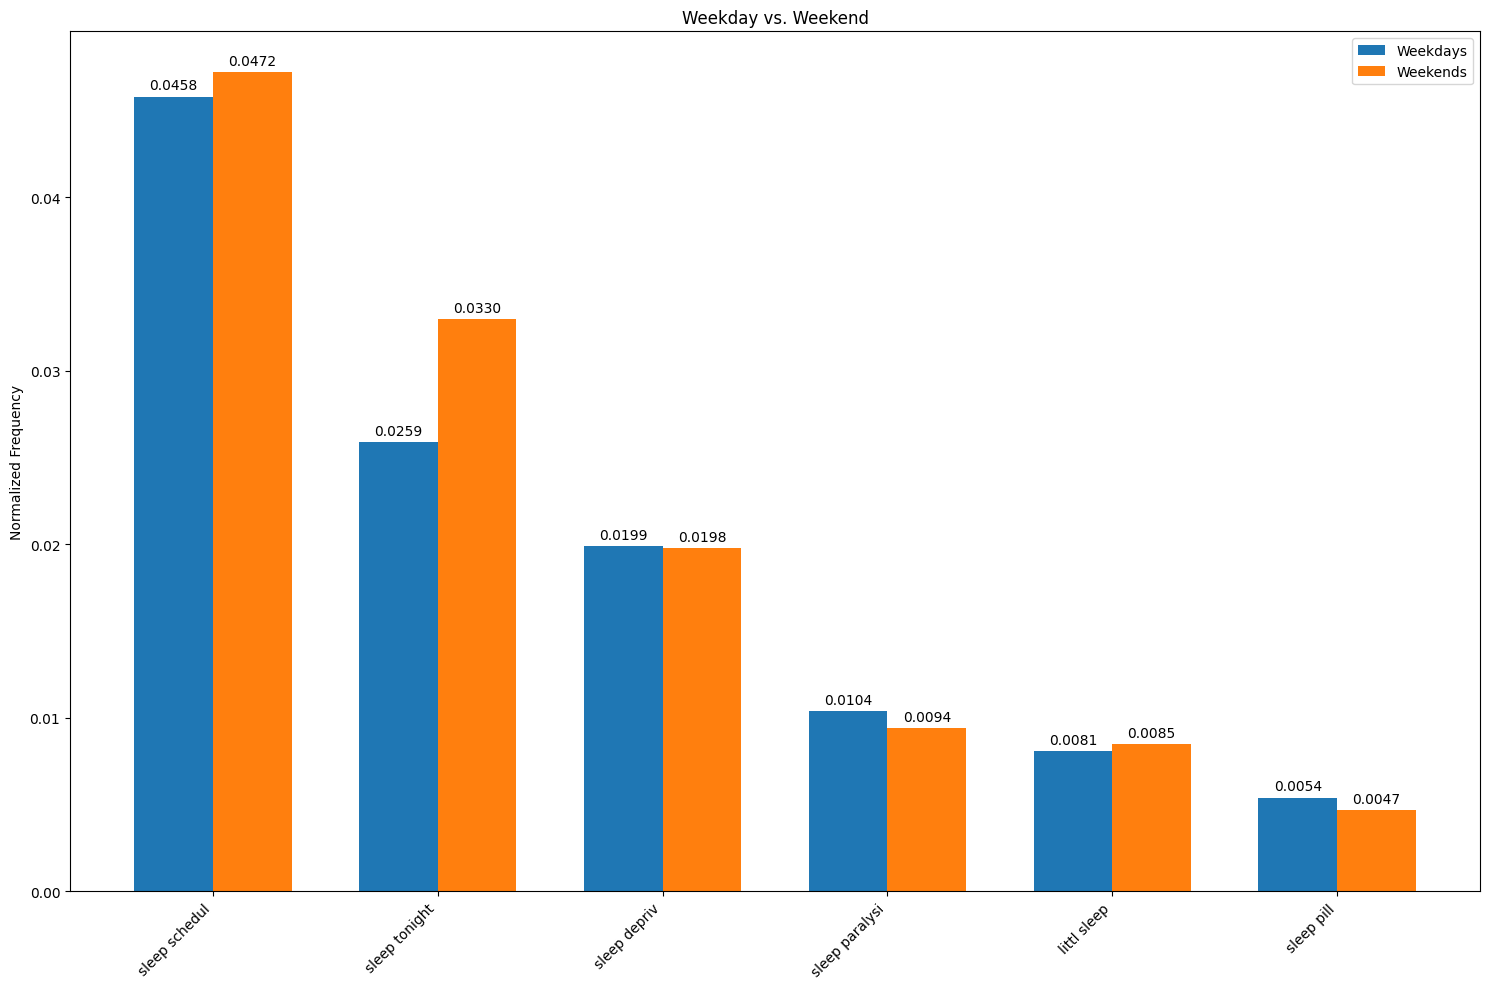

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import numpy as np
import matplotlib.pyplot as plt

weekday_data = [
    ('sleep schedul', 0.0458),
    ('sleep tonight', 0.0259),
    ('sleep depriv', 0.0199),
    ('sleep paralysi', 0.0104),
    ('littl sleep', 0.0081),
    ('sleep pill', 0.0054)
]

weekend_data = [
    ('sleep schedul', 0.0472),
    ('sleep tonight', 0.0330),
    ('sleep depriv', 0.0198),
    ('sleep paralysi', 0.0094),
    ('littl sleep', 0.0085),
    ('sleep pill', 0.0047)
]

def plot_grouped_data(weekday_data, weekend_data):
    labels, weekday_freq = zip(*weekday_data)
    _, weekend_freq = zip(*weekend_data)
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 10))
    rects1 = ax.bar(x - width/2, weekday_freq, width, label='Weekdays')
    rects2 = ax.bar(x + width/2, weekend_freq, width, label='Weekends')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Normalized Frequency')
    ax.set_title('Weekday vs. Weekend')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.4f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.savefig('frequentwordcomparison.png', dpi = 300, bbox_inches='tight')
    fig.tight_layout()
    plt.show()  

plot_grouped_data(weekday_data, weekend_data)


# Download the image file in Google Colab
from google.colab import files
files.download('frequentwordcomparison.png')


**clean up temporary files**

In [ ]:
import os
import shutil

working_directory = os.getcwd()
print(f"Current working directory: {working_directory}")

for item in os.listdir(working_directory):
    item_path = os.path.join(working_directory, item)
    
    # Check if the item is the mounted Google Drive folder
    if item != 'drive':
        # If the item is a file, remove it
        if os.path.isfile(item_path):
            os.remove(item_path)
        # If the item is a directory, remove it (including its contents)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)


Current working directory: /content
